<a href="https://colab.research.google.com/github/ToAotao/LearningHumanOrgans/blob/master/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install spacy
!pip install newsapi-python

In [5]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.4MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=4591a8384fb8aecc3999f42126b51bdb887aa33f70883c1bdd54329e7074dfa5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ip0mohl7/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
import spacy
from newsapi import NewsApiClient
import en_core_web_lg
spacy.prefer_gpu()
nlp_eng = en_core_web_lg.load()

newsapi = NewsApiClient (api_key='8308f57fcfe84a109369c944eeabe765')

In [7]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

alt.Chart(...)

In [8]:
articles = []
for i in range(1,5):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-23', to='2021-03-22', sort_by='relevancy', page=i)
  articles.append(temp)

In [11]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [32]:
import pandas as pd
dados=[]
titles= [100]
dates = [100]
descriptions = [100]

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title':titles[0], 'date':dates[0], 'desc':descriptions[0], 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,100,100,100,What do you think the next few months look lik...
1,100,100,100,Why havent I seen Wayne Knight in the ads for ...
2,100,100,100,Similar laborious efforts may have to be scale...
3,100,100,100,But medical ethicists say the list is misleadi...
4,100,100,100,"How is the Green Passport system working, for ..."


In [96]:
import string

pos_tag = ['VERB','NOUN','PROPN']
def get_keywords_eng(str1):
  doc = nlp_eng(str1)
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
    return result

In [97]:
from collections import Counter
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

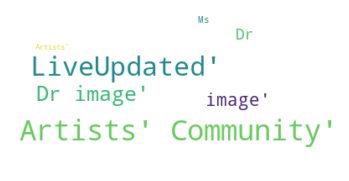

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()